In [1]:
import tweepy  
import pandas as pd
import re  
#import jsonpickle 
import string 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("dataset.pkl")
df.head()

,id,label,text
0,1234837799045562370,-1,RT @makkahregion: في حال كان القادم مواطناً لإ...
1,1234837796248002560,0,RT @AlAjmyAhmad: #اللهم إنّا نستودعك بلاد الحر...
2,1234837793152667648,0,RT @NadaBassiouny7: فيروس كورونا ؛ عدد الوفيات...
3,1234837791588089856,0,وزيره الصحة هتقعد في الصين شوية ياريت اما ترجع...
4,1234837787913969669,-1,RT @makkahregion: في حال كان الراغب في دخول ال...


In [3]:
df_new = pd.read_csv("newdatasett2.csv")
len(df),len(df_new)

(1489, 2000)

In [4]:
df_new = df_new[['text', 'label']]

In [5]:
df_new['label'].value_counts()

TRUE     742
Not      516
FALSE    143
Name: label, dtype: int64

In [6]:
df_new = df_new[df_new['label'] == 'FALSE']

In [7]:
df = df[['text', 'label']]

In [8]:
df['label'].value_counts()

-1    687
0     576
1     226
Name: label, dtype: int64

In [9]:
df_new['sen_class'] = df_new['label'].map({'FALSE': '1'})

In [10]:
df_new.head()

,text,label,sen_class
8,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
9,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
10,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
126,"أخبار الصحة في دقيقتين: 💉 ""أسترازينيكا"" تعلن ...",FALSE,1
136,RT @karim_a84: د. عبدالله السند: 🔹بدأ التسجيل...,FALSE,1


In [11]:
df_new = df_new.dropna()[['text', 'sen_class']]

In [12]:
df_new = df_new[['text', 'sen_class']]

In [13]:
df['sen_class'] = df['label']

In [14]:
df = df[['text', 'sen_class']]

In [15]:
df = df.dropna()[['text', 'sen_class']]

In [16]:
final_df =  pd.concat([df,df_new])

In [17]:
final_df.shape

(1632, 2)

In [18]:
final_df.head()

,text,sen_class
0,RT @makkahregion: في حال كان القادم مواطناً لإ...,-1
1,RT @AlAjmyAhmad: #اللهم إنّا نستودعك بلاد الحر...,0
2,RT @NadaBassiouny7: فيروس كورونا ؛ عدد الوفيات...,0
3,وزيره الصحة هتقعد في الصين شوية ياريت اما ترجع...,0
4,RT @makkahregion: في حال كان الراغب في دخول ال...,-1


In [19]:
final_df['sen_class'].value_counts()

-1    687
0     576
1     369
Name: sen_class, dtype: int64

In [20]:
final_df['sen_class'] = final_df['sen_class'].map({'1': 'fake','0': 'unrelated','-1': 'true'})

In [21]:
final_df['sen_class'].value_counts()

true         687
unrelated    576
fake         369
Name: sen_class, dtype: int64

In [22]:
print('tweets Dataset:\t', final_df.shape)
for cls in ['true', 'unrelated', 'fake']:
    print(f'Class {cls}:\t', final_df[final_df.sen_class == cls].shape)

tweets Dataset:	 (1632, 2)
Class true:	 (687, 2)
Class unrelated:	 (576, 2)
Class fake:	 (369, 2)


In [24]:
df = final_df.copy()

In [25]:
df = df[df['text'].notnull()]

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,text,sen_class
0,RT @makkahregion: في حال كان القادم مواطناً لإ...,true
1,RT @AlAjmyAhmad: #اللهم إنّا نستودعك بلاد الحر...,unrelated
2,RT @NadaBassiouny7: فيروس كورونا ؛ عدد الوفيات...,unrelated
3,وزيره الصحة هتقعد في الصين شوية ياريت اما ترجع...,unrelated
4,RT @makkahregion: في حال كان الراغب في دخول ال...,true


## training step

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # two vectorization methods we want for later
from sklearn.model_selection import train_test_split # this splits the data loaded in into training & testing groups
from sklearn import metrics # this will help us understand the results of the train/test split simulation

In [29]:
df['label'] =df['sen_class']
df = df[['text','label']]

X = df['text'].values
y = df['label'].values

# split the new DataFrame into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1, stratify = df.label)

In [30]:
X_train.shape

(1305,)

In [31]:
# define a function that accepts a vectorizer and calculates the accuracy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB # multinomial naive bayes classifier
from sklearn.linear_model import LogisticRegression # basic logistic regression classifier

from sklearn.svm import SVC

lr = LogisticRegression()
nb = MultinomialNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
def tokenize_test(vect, model):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    if model == 'lr':
        lr.fit(X_train_dtm, y_train)
        y_pred_class = lr.predict(X_test_dtm)
        algorithm = 'Logistic Regression'
    elif model == 'nb':
        nb.fit(X_train_dtm, y_train)
        y_pred_class = nb.predict(X_test_dtm)
        algorithm = 'Multinomial Naive Bayes'
    elif model == 'dt':
        dt.fit(X_train_dtm, y_train)
        y_pred_class = dt.predict(X_test_dtm)
        algorithm = 'Decision Tree'
    elif model == 'knn':
        knn.fit(X_train_dtm, y_train)
        y_pred_class = knn.predict(X_test_dtm)
        algorithm = 'K Neighbors'
    elif model == 'svm':
        svm.fit(X_train_dtm, y_train)
        y_pred_class = svm.predict(X_test_dtm)
        algorithm = 'SVM'
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print(confusion_matrix(y_test,y_pred_class))
    print(classification_report(y_test, y_pred_class))
    print(algorithm)
        

In [32]:
vect = CountVectorizer()
tokenize_test(vect, model='lr')

Features:  8537
Accuracy:  0.8532110091743119
[[ 58   6  10]
 [  3 122  13]
 [  6  10  99]]
              precision    recall  f1-score   support

        fake       0.87      0.78      0.82        74
        true       0.88      0.88      0.88       138
   unrelated       0.81      0.86      0.84       115

    accuracy                           0.85       327
   macro avg       0.85      0.84      0.85       327
weighted avg       0.85      0.85      0.85       327

Logistic Regression


In [33]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='lr')

Features:  25679
Accuracy:  0.8654434250764526
[[ 58   6  10]
 [  2 121  15]
 [  4   7 104]]
              precision    recall  f1-score   support

        fake       0.91      0.78      0.84        74
        true       0.90      0.88      0.89       138
   unrelated       0.81      0.90      0.85       115

    accuracy                           0.87       327
   macro avg       0.87      0.85      0.86       327
weighted avg       0.87      0.87      0.87       327

Logistic Regression


In [34]:
vect = CountVectorizer()
tokenize_test(vect, model='nb')

Features:  8537
Accuracy:  0.8103975535168195
[[ 51  16   7]
 [  1 130   7]
 [  3  28  84]]
              precision    recall  f1-score   support

        fake       0.93      0.69      0.79        74
        true       0.75      0.94      0.83       138
   unrelated       0.86      0.73      0.79       115

    accuracy                           0.81       327
   macro avg       0.84      0.79      0.80       327
weighted avg       0.83      0.81      0.81       327

Multinomial Naive Bayes


In [35]:
# include 1-grams, 2-grams, 
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='nb')

Features:  25679
Accuracy:  0.8134556574923547
[[ 52  16   6]
 [  1 132   5]
 [  2  31  82]]
              precision    recall  f1-score   support

        fake       0.95      0.70      0.81        74
        true       0.74      0.96      0.83       138
   unrelated       0.88      0.71      0.79       115

    accuracy                           0.81       327
   macro avg       0.85      0.79      0.81       327
weighted avg       0.84      0.81      0.81       327

Multinomial Naive Bayes


In [36]:
vect = CountVectorizer()
tokenize_test(vect, model='dt')

Features:  8537
Accuracy:  0.7859327217125383
[[ 52  11  11]
 [  8 112  18]
 [  5  17  93]]
              precision    recall  f1-score   support

        fake       0.80      0.70      0.75        74
        true       0.80      0.81      0.81       138
   unrelated       0.76      0.81      0.78       115

    accuracy                           0.79       327
   macro avg       0.79      0.77      0.78       327
weighted avg       0.79      0.79      0.79       327

Decision Tree


In [37]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='dt')

Features:  25679
Accuracy:  0.7584097859327217
[[ 55   8  11]
 [ 11 105  22]
 [ 10  17  88]]
              precision    recall  f1-score   support

        fake       0.72      0.74      0.73        74
        true       0.81      0.76      0.78       138
   unrelated       0.73      0.77      0.75       115

    accuracy                           0.76       327
   macro avg       0.75      0.76      0.75       327
weighted avg       0.76      0.76      0.76       327

Decision Tree


In [38]:
vect = CountVectorizer()
tokenize_test(vect, model='knn')

Features:  8537
Accuracy:  0.6085626911314985
[[58  8  8]
 [30 86 22]
 [29 31 55]]
              precision    recall  f1-score   support

        fake       0.50      0.78      0.61        74
        true       0.69      0.62      0.65       138
   unrelated       0.65      0.48      0.55       115

    accuracy                           0.61       327
   macro avg       0.61      0.63      0.60       327
weighted avg       0.63      0.61      0.61       327

K Neighbors


In [39]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='knn')

Features:  25679
Accuracy:  0.599388379204893
[[50  9 15]
 [20 81 37]
 [17 33 65]]
              precision    recall  f1-score   support

        fake       0.57      0.68      0.62        74
        true       0.66      0.59      0.62       138
   unrelated       0.56      0.57      0.56       115

    accuracy                           0.60       327
   macro avg       0.60      0.61      0.60       327
weighted avg       0.60      0.60      0.60       327

K Neighbors


In [40]:
vect = CountVectorizer()
tokenize_test(vect, model='svm')

Features:  8537
Accuracy:  0.8165137614678899
[[ 54  11   9]
 [  3 125  10]
 [  3  24  88]]
              precision    recall  f1-score   support

        fake       0.90      0.73      0.81        74
        true       0.78      0.91      0.84       138
   unrelated       0.82      0.77      0.79       115

    accuracy                           0.82       327
   macro avg       0.83      0.80      0.81       327
weighted avg       0.82      0.82      0.82       327

SVM


In [41]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='svm')

Features:  25679
Accuracy:  0.8042813455657493
[[ 53  14   7]
 [  3 127   8]
 [  2  30  83]]
              precision    recall  f1-score   support

        fake       0.91      0.72      0.80        74
        true       0.74      0.92      0.82       138
   unrelated       0.85      0.72      0.78       115

    accuracy                           0.80       327
   macro avg       0.83      0.79      0.80       327
weighted avg       0.82      0.80      0.80       327

SVM


## TF-IDF

In [42]:
vect = TfidfVectorizer()
tokenize_test(vect, model='lr')


Features:  8537
Accuracy:  0.8195718654434251
[[ 50  13  11]
 [  0 128  10]
 [  3  22  90]]
              precision    recall  f1-score   support

        fake       0.94      0.68      0.79        74
        true       0.79      0.93      0.85       138
   unrelated       0.81      0.78      0.80       115

    accuracy                           0.82       327
   macro avg       0.85      0.80      0.81       327
weighted avg       0.83      0.82      0.82       327

Logistic Regression


In [43]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='lr')

Features:  25679
Accuracy:  0.8134556574923547
[[ 48  17   9]
 [  2 129   7]
 [  1  25  89]]
              precision    recall  f1-score   support

        fake       0.94      0.65      0.77        74
        true       0.75      0.93      0.83       138
   unrelated       0.85      0.77      0.81       115

    accuracy                           0.81       327
   macro avg       0.85      0.79      0.80       327
weighted avg       0.83      0.81      0.81       327

Logistic Regression


In [44]:
vect = TfidfVectorizer()
tokenize_test(vect, model='nb')

Features:  8537
Accuracy:  0.7614678899082569
[[ 44  27   3]
 [  0 134   4]
 [  1  43  71]]
              precision    recall  f1-score   support

        fake       0.98      0.59      0.74        74
        true       0.66      0.97      0.78       138
   unrelated       0.91      0.62      0.74       115

    accuracy                           0.76       327
   macro avg       0.85      0.73      0.75       327
weighted avg       0.82      0.76      0.76       327

Multinomial Naive Bayes


In [45]:
# include 1-grams, 2-grams, 
vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='nb')

Features:  25679
Accuracy:  0.7553516819571865
[[ 44  28   2]
 [  0 136   2]
 [  1  47  67]]
              precision    recall  f1-score   support

        fake       0.98      0.59      0.74        74
        true       0.64      0.99      0.78       138
   unrelated       0.94      0.58      0.72       115

    accuracy                           0.76       327
   macro avg       0.86      0.72      0.75       327
weighted avg       0.83      0.76      0.75       327

Multinomial Naive Bayes


In [46]:
vect = TfidfVectorizer()
tokenize_test(vect, model='dt')

Features:  8537
Accuracy:  0.6666666666666666
[[ 51  17   6]
 [ 11 117  10]
 [  6  59  50]]
              precision    recall  f1-score   support

        fake       0.75      0.69      0.72        74
        true       0.61      0.85      0.71       138
   unrelated       0.76      0.43      0.55       115

    accuracy                           0.67       327
   macro avg       0.70      0.66      0.66       327
weighted avg       0.69      0.67      0.66       327

Decision Tree


In [47]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='dt')

Features:  25679
Accuracy:  0.7033639143730887
[[ 57  14   3]
 [ 14 110  14]
 [  9  43  63]]
              precision    recall  f1-score   support

        fake       0.71      0.77      0.74        74
        true       0.66      0.80      0.72       138
   unrelated       0.79      0.55      0.65       115

    accuracy                           0.70       327
   macro avg       0.72      0.71      0.70       327
weighted avg       0.72      0.70      0.70       327

Decision Tree


In [48]:
vect = TfidfVectorizer()
tokenize_test(vect, model='knn')

Features:  8537
Accuracy:  0.746177370030581
[[ 52  17   5]
 [  7 125   6]
 [ 19  29  67]]
              precision    recall  f1-score   support

        fake       0.67      0.70      0.68        74
        true       0.73      0.91      0.81       138
   unrelated       0.86      0.58      0.69       115

    accuracy                           0.75       327
   macro avg       0.75      0.73      0.73       327
weighted avg       0.76      0.75      0.74       327

K Neighbors


In [49]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='knn')

Features:  25679
Accuracy:  0.7737003058103975
[[ 53  17   4]
 [  7 125   6]
 [ 12  28  75]]
              precision    recall  f1-score   support

        fake       0.74      0.72      0.73        74
        true       0.74      0.91      0.81       138
   unrelated       0.88      0.65      0.75       115

    accuracy                           0.77       327
   macro avg       0.78      0.76      0.76       327
weighted avg       0.79      0.77      0.77       327

K Neighbors


In [50]:
vect = TfidfVectorizer()
tokenize_test(vect, model='svm')

Features:  8537
Accuracy:  0.8287461773700305
[[ 48  14  12]
 [  0 127  11]
 [  0  19  96]]
              precision    recall  f1-score   support

        fake       1.00      0.65      0.79        74
        true       0.79      0.92      0.85       138
   unrelated       0.81      0.83      0.82       115

    accuracy                           0.83       327
   macro avg       0.87      0.80      0.82       327
weighted avg       0.84      0.83      0.83       327

SVM


In [51]:

# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='svm')

Features:  25679
Accuracy:  0.8226299694189603
[[ 45  18  11]
 [  0 128  10]
 [  0  19  96]]
              precision    recall  f1-score   support

        fake       1.00      0.61      0.76        74
        true       0.78      0.93      0.84       138
   unrelated       0.82      0.83      0.83       115

    accuracy                           0.82       327
   macro avg       0.87      0.79      0.81       327
weighted avg       0.84      0.82      0.82       327

SVM


## Deep Learning

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [53]:
df['label'] = df['label'].astype('str').values
df['label'] = df['label'].astype('category').values
df['label'] = df['label'].cat.codes
df['label'].value_counts()


1    687
2    576
0    369
Name: label, dtype: int64

In [54]:
X = df['text'].values
y = df['label'].values

# split the new DataFrame into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1, stratify = df.label)

In [55]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
#tokenizer = Tokenizer(num_words=500)

tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [56]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train_sequences[2])
print(X_train[2])

[3, 401, 2698, 26, 2699, 2700, 110, 2, 17, 2701, 1523, 125, 2702, 472, 110, 2703, 2704, 7, 118, 1044, 640, 2705, 225, 2706]
RT @Dr_AlShahoumi: مع الضجيج الحاصل بسبب كورونا و التصفيق العالي الذي ناله البعض بسبب قيامه بواجبه في هذه الازمه 

ومع انشغال الجميع  

حتم…


In [57]:
from keras.preprocessing.sequence import pad_sequences

#maxlen = 25

maxlen = 25



X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)

print(X_train_pad[0, :])

[   3 2687 2688  125 2689  188  471    2   34 2690 2691 2692 2693 1521
    7 2694  224 1522 2695 2696 2697  535    0    0    0]


In [58]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 500)           4709500   
                                                                 
 global_max_pooling1d (Globa  (None, 500)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                5010      
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 4,714,543
Trainable params: 4,714,543
Non-trainable params: 0
_________________________________________________________________


In [59]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.9985
Testing Accuracy:  0.8502


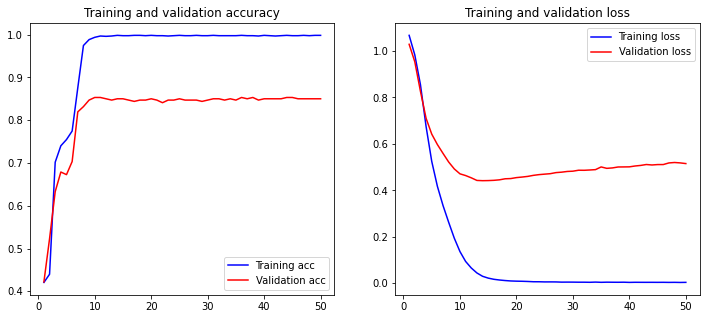

In [60]:
history = model.fit(X_train_pad, 
                    y_train,epochs=50,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [62]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#ynew = model.predict_classes(X_test)

predict_x=model.predict(X_test_pad) 
classes_x=np.argmax(predict_x,axis=1)

print(confusion_matrix(y_test,classes_x))
print(classification_report(y_test,classes_x))
print(accuracy_score(y_test, classes_x))

[[ 59   5  10]
 [  2 123  13]
 [  6  13  96]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        74
           1       0.87      0.89      0.88       138
           2       0.81      0.83      0.82       115

    accuracy                           0.85       327
   macro avg       0.85      0.84      0.85       327
weighted avg       0.85      0.85      0.85       327

0.8501529051987767


## Comparison Table for Models without Text Cleaning

| classifier | Accuracy | Precision | Recall | F1 score |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.85 |  0.85 | 0.84 | 0.85 |
| Logistic Regression & ngram| 0.87 |  0.87 | 0.85 | 0.86 |
| Logistic Regression & TF-IDF| 0.82 |  0.85 | 0.80 | 0.81 |
| Logistic Regression & TF-IDF & ngram| 0.81 |  0.85 | 0.79 | 0.80 |
| Multinomial Naive Bayes| 0.81 |  0.84 | 0.79 | 0.80 |
| Multinomial Naive Bayes & ngram| 0.81 |  0.85 | 0.79 | 0.81 |
| Multinomial Naive Bayes & TF-IDF | 0.76 |  0.85 | 0.73 | 0.75 |
| Multinomial Naive Bayes & TF-IDF & ngram| 0.76 |  0.86 | 0.72 | 0.75 |
| Decision Tree| 0.79 |  0.79 | 0.77 | 0.78 |
| Decision Tree & ngram| 0.76 |  0.75 | 0.76 | 0.75 |
| Decision Tree & TF-IDF| 0.67 |  0.70 | 0.66 | 0.66 |
| Decision Tree & TF-IDF & ngram| 0.70 |  0.72 | 0.71 | 0.70 |
| K Neighbors| 0.61 |  0.61 | 0.63 | 0.60 |
| K Neighbors & ngram| 0.60 |  0.60 | 0.61 | 0.60 |
| K Neighbors & TF-IDF | 0.75 |  0.75 | 0.73 | 0.73 |
| K Neighbors & TF-IDF & ngram| 0.77 |  0.78 | 0.76 | 0.76 |
| SVM | 0.82 |  0.83 | 0.80 | 0.81 |
| SVM & ngram | 0.80 |  0.79 | 0.80 | 0.80 |
| SVM & TF-IDF | 0.83 |  0.87 | 0.80 | 0.82 |
| SVM & TF-IDF & ngram| 0.82 |  0.87 | 0.79 | 0.81 |
| Deep Learning & Word Embeddings | 0.85 |  0.84 | 0.84 | 0.85 |